# World Happiness Report
Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

happiness_score_dataset.csv

In [1]:
#We will load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns

from pandas.plotting import scatter_matrix

!pip install plotly

import plotly 

In [3]:
df1=pd.read_csv(r"C:\Users\win 7\Desktop\Datascience\World Happiness Report & Salary Project\2015.csv")

In [4]:
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df1.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df1.shape

(158, 12)

In [8]:
#Checking if we have any NA value
df1.isnull().values.any()

False

In [9]:
#Statistical values for all numeric variables as count, max, mean and quantiles
df1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Visualization

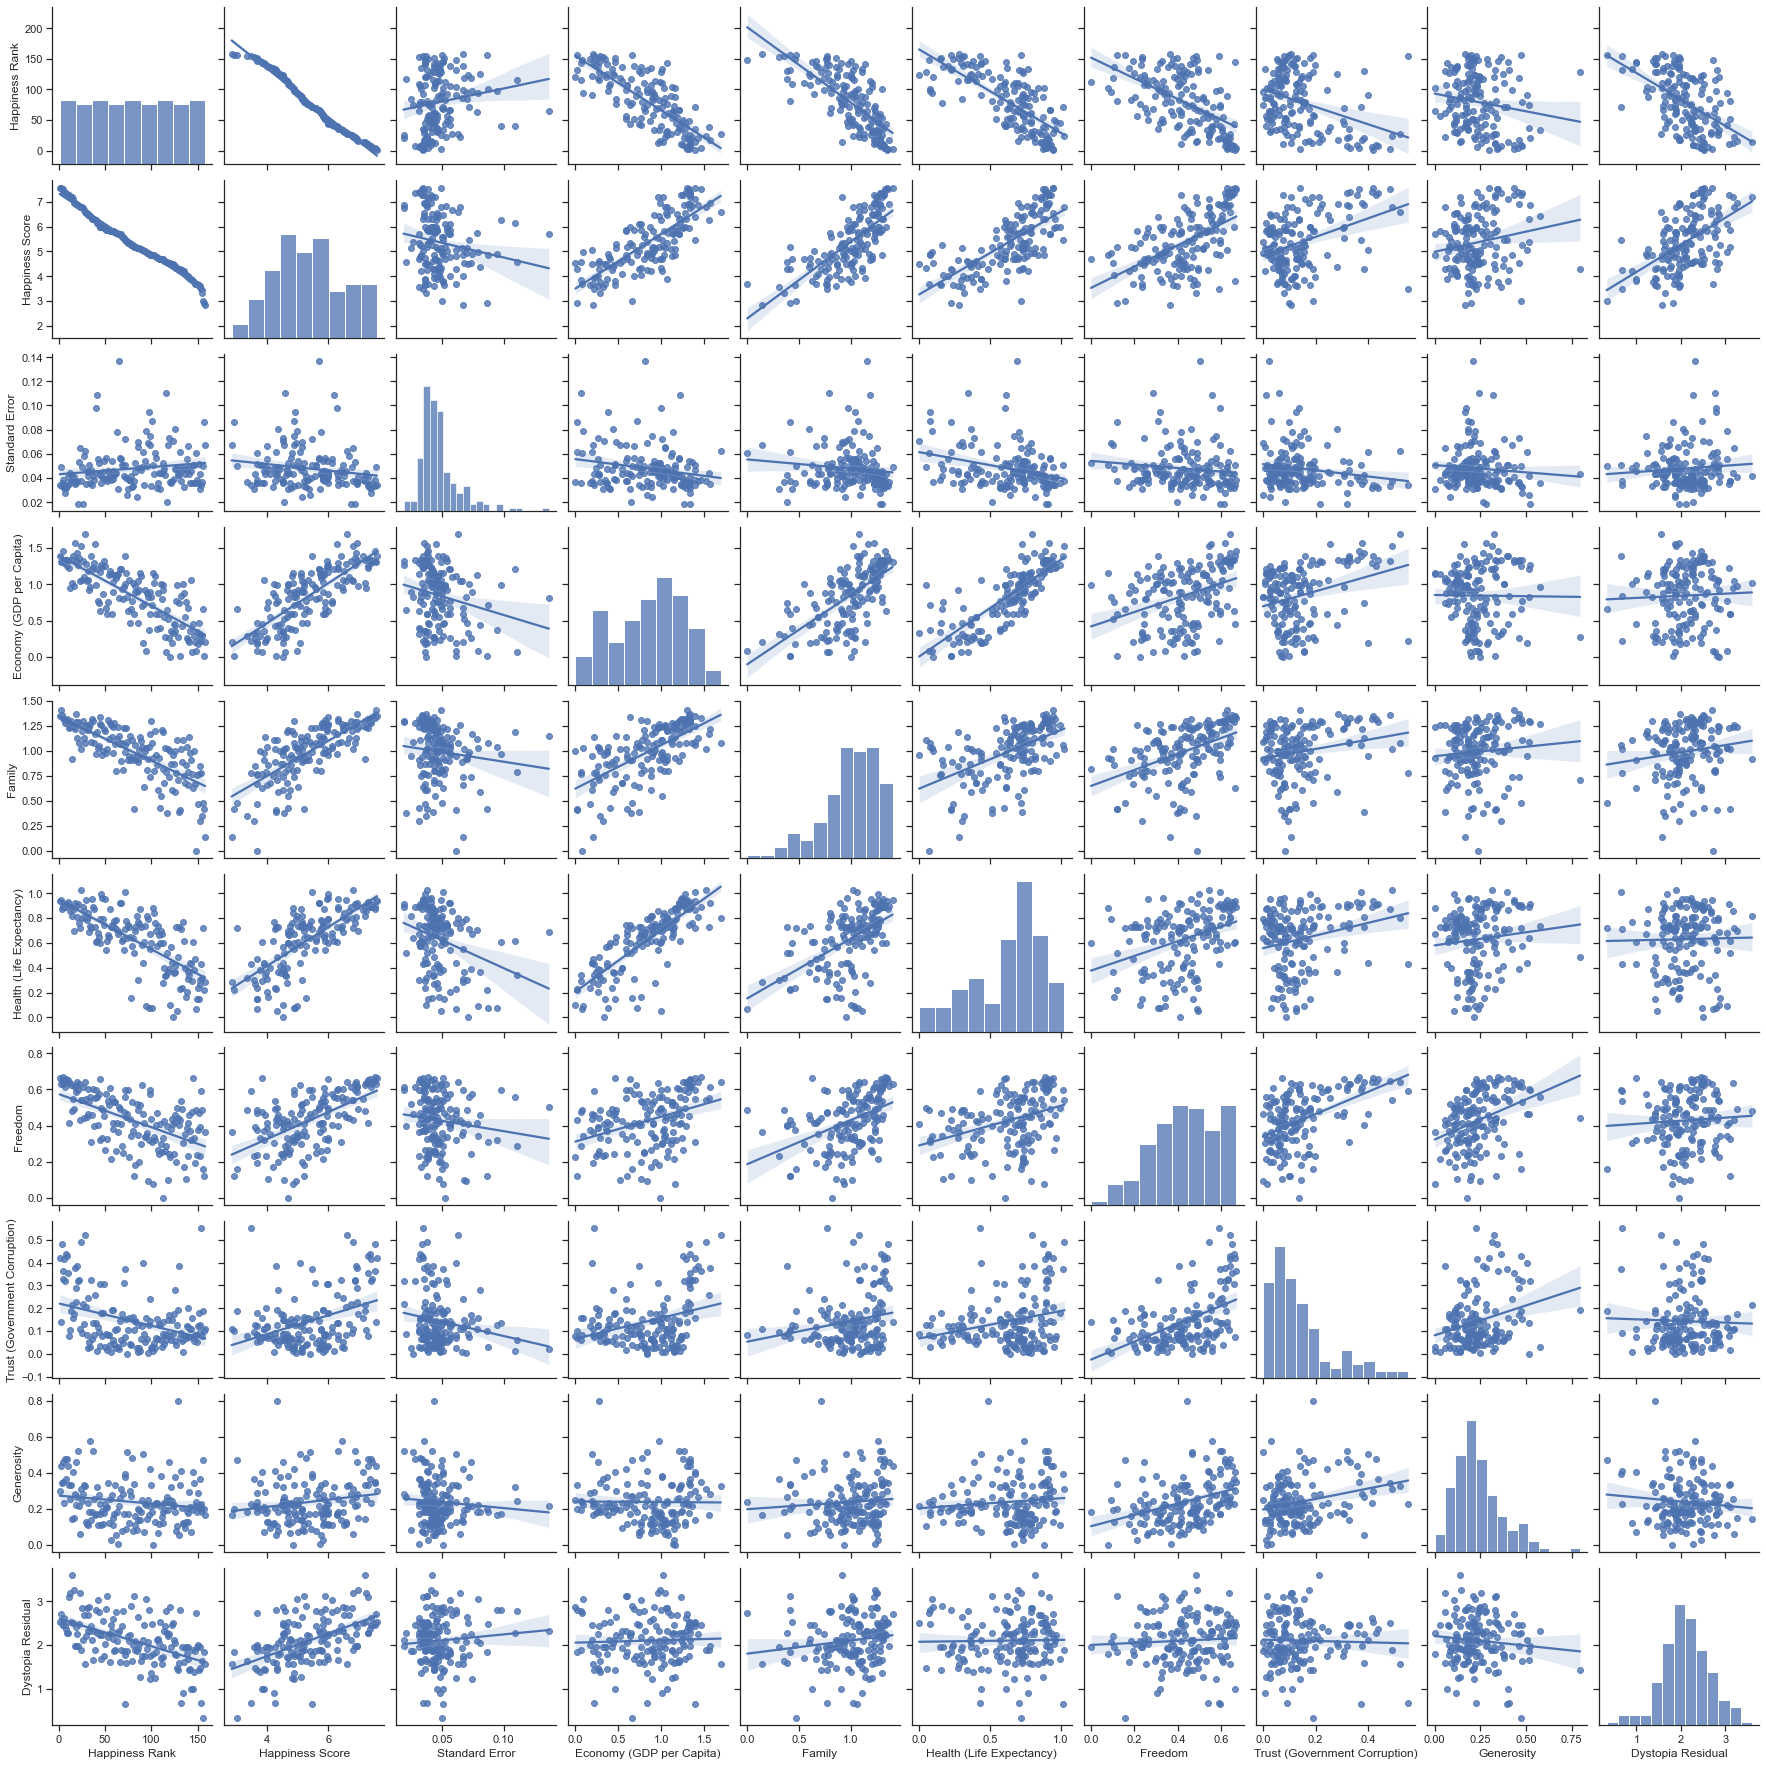

In [10]:
#Let's check all columns by pair plot 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df1, kind="reg")

C:\Users\WIN7~1\AppData\Local\Temp/ipykernel_3060/3672830488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df1.corr()


<AxesSubplot:>

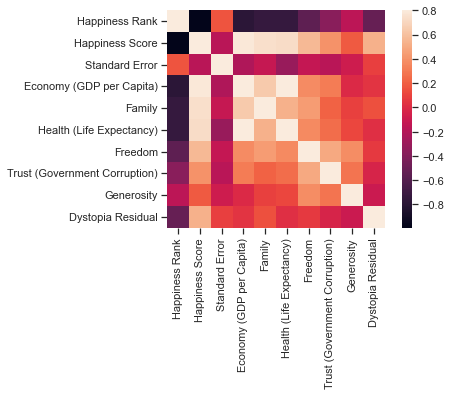

In [11]:
#Check correlation of each values 
corrmat = df1.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

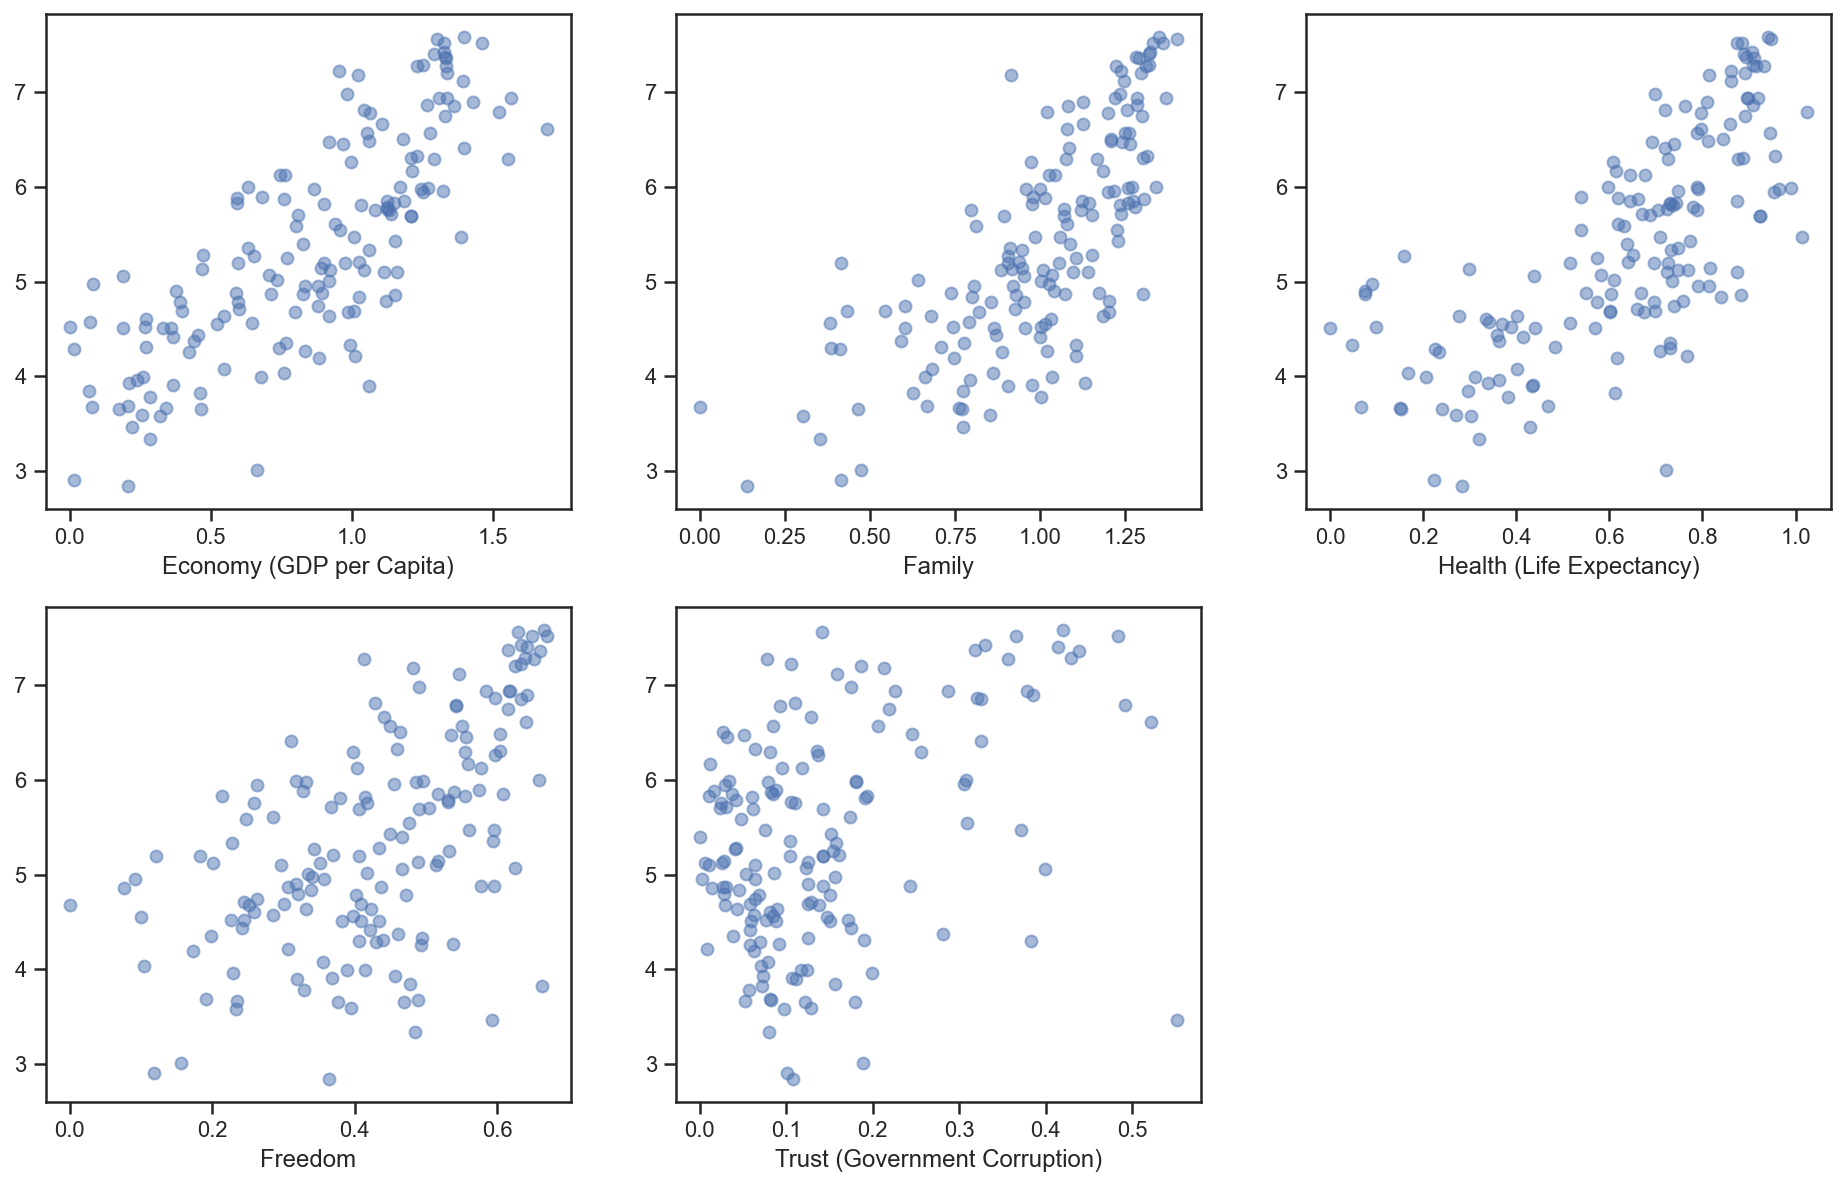

In [12]:
#let's check highly correlated columns separately 

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 10))
for i, key in enumerate(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']):
    plt.subplot(2, 3, i+1)
    plt.xlabel(key)
    plt.scatter(df1[key], df1['Happiness Score'], alpha=0.5)

In [13]:
from pandas.plotting import scatter_matrix
from pandas.plotting import scatter_matrix


In [14]:
import chart_studio

In [15]:
chart_studio.tools.set_credentials_file(
username='meryemdikmen', api_key='HkPHBVsn5LcaL3ogcTm2'
)

In [16]:
import plotly 
#plotly.tools.set_credentials_file(username='meryemdikmen', api_key='HkPHBVsn5LcaL3ogcTm2')

In [17]:
#I wanted to see happiness score distribution on the world map for 2015 results
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #loading necessary libraries for mapping
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', #As we have only country names in data, we can use country names to see the happiness
           locations = df1['Country'],
           locationmode = 'country names',
           z = df1['Happiness Score'], 
           text = df1['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness 2015', 
             geo = dict(showframe = False, 
                       projection = {'type': 'airy'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3) 

# Salary Project
Problem Statement:
Problem Statement
Predict the salary if the employee using the features provided in the data. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\win 7\Desktop\Datascience\World Happiness Report & Salary Project\\Salaries.csv")

In [3]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
data.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [5]:
data.shape

(397, 6)

In [6]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [8]:
data.count()

rank             397
discipline       397
yrs.since.phd    397
yrs.service      397
sex              397
salary           397
dtype: int64

In [9]:
data.shape

(397, 6)

In [10]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [11]:
data.isnull().count()

rank             397
discipline       397
yrs.since.phd    397
yrs.service      397
sex              397
salary           397
dtype: int64

In [12]:
data.drop(['rank'],axis=1,inplace=True)

In [13]:
data.drop(['discipline'],axis=1,inplace=True)

In [14]:
data.drop(['yrs.since.phd'],axis=1,inplace=True)

In [15]:
data.drop(['sex'],axis=1,inplace=True)

In [16]:
data.head()

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500


In [17]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,:1].values

In [18]:
data

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
...,...,...
392,30,103106
393,19,150564
394,25,101738
395,15,95329


In [19]:
X


array([[18],
       [16],
       [ 3],
       [39],
       [41],
       [ 6],
       [23],
       [45],
       [20],
       [18],
       [ 8],
       [ 2],
       [ 1],
       [ 0],
       [18],
       [ 3],
       [20],
       [34],
       [23],
       [36],
       [26],
       [31],
       [30],
       [19],
       [ 8],
       [ 8],
       [23],
       [ 3],
       [ 0],
       [ 8],
       [ 4],
       [ 2],
       [ 9],
       [ 2],
       [ 2],
       [ 0],
       [21],
       [ 4],
       [31],
       [ 9],
       [ 2],
       [23],
       [27],
       [38],
       [19],
       [15],
       [28],
       [19],
       [25],
       [ 1],
       [28],
       [11],
       [ 3],
       [ 9],
       [11],
       [ 5],
       [21],
       [ 8],
       [ 9],
       [ 3],
       [ 8],
       [ 2],
       [31],
       [11],
       [ 3],
       [ 8],
       [12],
       [31],
       [17],
       [36],
       [ 2],
       [45],
       [19],
       [34],
       [23],
       [ 3],
       [ 3],

In [20]:
Y

array([[18],
       [16],
       [ 3],
       [39],
       [41],
       [ 6],
       [23],
       [45],
       [20],
       [18],
       [ 8],
       [ 2],
       [ 1],
       [ 0],
       [18],
       [ 3],
       [20],
       [34],
       [23],
       [36],
       [26],
       [31],
       [30],
       [19],
       [ 8],
       [ 8],
       [23],
       [ 3],
       [ 0],
       [ 8],
       [ 4],
       [ 2],
       [ 9],
       [ 2],
       [ 2],
       [ 0],
       [21],
       [ 4],
       [31],
       [ 9],
       [ 2],
       [23],
       [27],
       [38],
       [19],
       [15],
       [28],
       [19],
       [25],
       [ 1],
       [28],
       [11],
       [ 3],
       [ 9],
       [11],
       [ 5],
       [21],
       [ 8],
       [ 9],
       [ 3],
       [ 8],
       [ 2],
       [31],
       [11],
       [ 3],
       [ 8],
       [12],
       [31],
       [17],
       [36],
       [ 2],
       [45],
       [19],
       [34],
       [23],
       [ 3],
       [ 3],

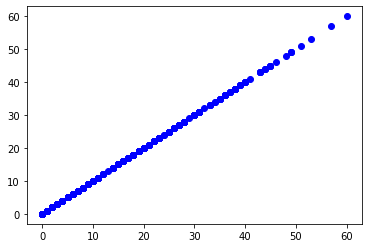

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X,Y,color = "blue")

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state = 0)

In [23]:
x_train

array([[28],
       [23],
       [15],
       [22],
       [30],
       [34],
       [19],
       [33],
       [ 4],
       [ 0],
       [12],
       [14],
       [ 4],
       [ 9],
       [ 6],
       [29],
       [37],
       [14],
       [35],
       [ 1],
       [ 7],
       [14],
       [15],
       [26],
       [ 7],
       [11],
       [35],
       [ 1],
       [ 2],
       [26],
       [ 2],
       [ 3],
       [ 7],
       [14],
       [ 2],
       [19],
       [ 9],
       [38],
       [36],
       [ 0],
       [33],
       [ 8],
       [28],
       [16],
       [11],
       [10],
       [34],
       [14],
       [38],
       [ 7],
       [22],
       [ 8],
       [ 5],
       [27],
       [ 7],
       [11],
       [ 4],
       [28],
       [ 3],
       [ 3],
       [ 1],
       [18],
       [11],
       [26],
       [ 7],
       [ 7],
       [19],
       [11],
       [ 1],
       [48],
       [ 7],
       [25],
       [ 0],
       [ 5],
       [31],
       [31],
       [ 8],

In [24]:
y_train

array([[28],
       [23],
       [15],
       [22],
       [30],
       [34],
       [19],
       [33],
       [ 4],
       [ 0],
       [12],
       [14],
       [ 4],
       [ 9],
       [ 6],
       [29],
       [37],
       [14],
       [35],
       [ 1],
       [ 7],
       [14],
       [15],
       [26],
       [ 7],
       [11],
       [35],
       [ 1],
       [ 2],
       [26],
       [ 2],
       [ 3],
       [ 7],
       [14],
       [ 2],
       [19],
       [ 9],
       [38],
       [36],
       [ 0],
       [33],
       [ 8],
       [28],
       [16],
       [11],
       [10],
       [34],
       [14],
       [38],
       [ 7],
       [22],
       [ 8],
       [ 5],
       [27],
       [ 7],
       [11],
       [ 4],
       [28],
       [ 3],
       [ 3],
       [ 1],
       [18],
       [11],
       [26],
       [ 7],
       [ 7],
       [19],
       [11],
       [ 1],
       [48],
       [ 7],
       [25],
       [ 0],
       [ 5],
       [31],
       [31],
       [ 8],

In [25]:
y_test

array([[ 8],
       [ 8],
       [23],
       [ 1],
       [ 4],
       [11],
       [ 1],
       [ 8],
       [ 1],
       [15],
       [18],
       [ 9],
       [25],
       [ 3],
       [10],
       [20],
       [19],
       [10],
       [18],
       [ 8],
       [27],
       [ 0],
       [ 4],
       [ 3],
       [ 9],
       [ 6],
       [11],
       [30],
       [17],
       [25],
       [30],
       [15],
       [ 0],
       [11],
       [ 7],
       [ 5],
       [25],
       [35],
       [16],
       [ 5],
       [23],
       [16],
       [36],
       [23],
       [14],
       [22],
       [38],
       [15],
       [37],
       [11],
       [ 6],
       [10],
       [20],
       [ 3],
       [ 8],
       [23],
       [15],
       [19],
       [53],
       [41],
       [22],
       [ 3],
       [ 8],
       [ 3],
       [ 8],
       [16],
       [ 6],
       [10],
       [11],
       [45],
       [ 5],
       [17],
       [26],
       [33],
       [18],
       [44],
       [ 3],

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(x_test)

In [28]:
y_pred  

array([[8.00000000e+00],
       [8.00000000e+00],
       [2.30000000e+01],
       [1.00000000e+00],
       [4.00000000e+00],
       [1.10000000e+01],
       [1.00000000e+00],
       [8.00000000e+00],
       [1.00000000e+00],
       [1.50000000e+01],
       [1.80000000e+01],
       [9.00000000e+00],
       [2.50000000e+01],
       [3.00000000e+00],
       [1.00000000e+01],
       [2.00000000e+01],
       [1.90000000e+01],
       [1.00000000e+01],
       [1.80000000e+01],
       [8.00000000e+00],
       [2.70000000e+01],
       [3.55271368e-15],
       [4.00000000e+00],
       [3.00000000e+00],
       [9.00000000e+00],
       [6.00000000e+00],
       [1.10000000e+01],
       [3.00000000e+01],
       [1.70000000e+01],
       [2.50000000e+01],
       [3.00000000e+01],
       [1.50000000e+01],
       [3.55271368e-15],
       [1.10000000e+01],
       [7.00000000e+00],
       [5.00000000e+00],
       [2.50000000e+01],
       [3.50000000e+01],
       [1.60000000e+01],
       [5.00000000e+00],


In [29]:
y_test   

array([[ 8],
       [ 8],
       [23],
       [ 1],
       [ 4],
       [11],
       [ 1],
       [ 8],
       [ 1],
       [15],
       [18],
       [ 9],
       [25],
       [ 3],
       [10],
       [20],
       [19],
       [10],
       [18],
       [ 8],
       [27],
       [ 0],
       [ 4],
       [ 3],
       [ 9],
       [ 6],
       [11],
       [30],
       [17],
       [25],
       [30],
       [15],
       [ 0],
       [11],
       [ 7],
       [ 5],
       [25],
       [35],
       [16],
       [ 5],
       [23],
       [16],
       [36],
       [23],
       [14],
       [22],
       [38],
       [15],
       [37],
       [11],
       [ 6],
       [10],
       [20],
       [ 3],
       [ 8],
       [23],
       [15],
       [19],
       [53],
       [41],
       [22],
       [ 3],
       [ 8],
       [ 3],
       [ 8],
       [16],
       [ 6],
       [10],
       [11],
       [45],
       [ 5],
       [17],
       [26],
       [33],
       [18],
       [44],
       [ 3],

In [30]:
residue = y_pred - y_test    # residue or error between actual and predicted salary
residue

array([[ 1.77635684e-15],
       [ 1.77635684e-15],
       [ 0.00000000e+00],
       [ 3.33066907e-15],
       [ 2.66453526e-15],
       [ 1.77635684e-15],
       [ 3.33066907e-15],
       [ 1.77635684e-15],
       [ 3.33066907e-15],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.77635684e-15],
       [-3.55271368e-15],
       [ 2.66453526e-15],
       [ 1.77635684e-15],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.77635684e-15],
       [ 0.00000000e+00],
       [ 1.77635684e-15],
       [-3.55271368e-15],
       [ 3.55271368e-15],
       [ 2.66453526e-15],
       [ 2.66453526e-15],
       [ 1.77635684e-15],
       [ 1.77635684e-15],
       [ 1.77635684e-15],
       [-3.55271368e-15],
       [ 0.00000000e+00],
       [-3.55271368e-15],
       [-3.55271368e-15],
       [ 0.00000000e+00],
       [ 3.55271368e-15],
       [ 1.77635684e-15],
       [ 1.77635684e-15],
       [ 2.66453526e-15],
       [-3.55271368e-15],
       [ 0.00000000e+00],
       [ 0.0

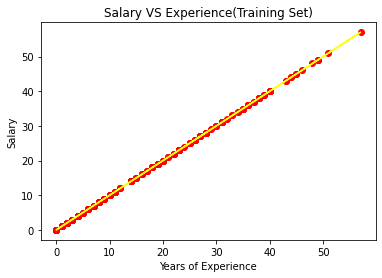

In [31]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train),color="yellow")
plt.title("Salary VS Experience(Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

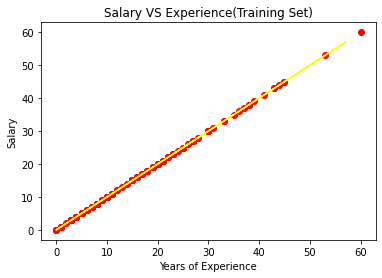

In [32]:
plt.scatter(x_test,y_test,color="Red")
plt.plot(x_train,regressor.predict(x_train),color="yellow")
plt.title("Salary VS Experience(Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [33]:
print(regressor.coef_)
print(regressor.intercept_)

[[1.]]
[3.55271368e-15]


In [34]:
y_test.shape

(132, 1)

In [35]:
y_pred.shape

(132, 1)

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)                           #built-in function r2_score() indicates R-squared value 

print("RMSE =", rmse)
print("R2 Score=",r2)

RMSE = 2.6639744813904716e-15
R2 Score= 1.0
